In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# 导入并观察数据
data = pd.read_csv('data.csv')
pd.set_option('display.max_columns', None)
print(data.columns)
print(data.head())
print(data.describe())

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42

In [3]:
# 将特征字段分为三组
features_mean = list(data.columns[2:12])
features_se = list(data.columns[12:22])
deatures_worst = list(data.columns[22:32])
# 数据清洗
# 删除id列
data.drop('id', axis=1, inplace=True)
# 将标签B良性替换为0，M恶性替换为1
data['diagnosis'] = data['diagnosis'].map({'B':0, 'M':1})

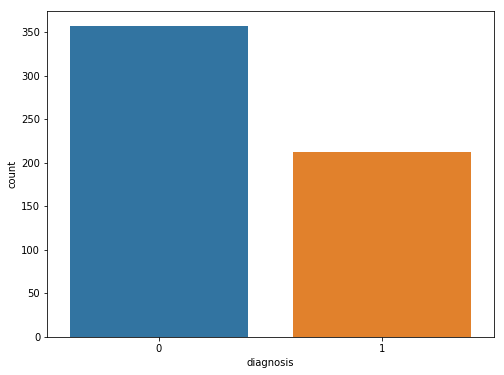

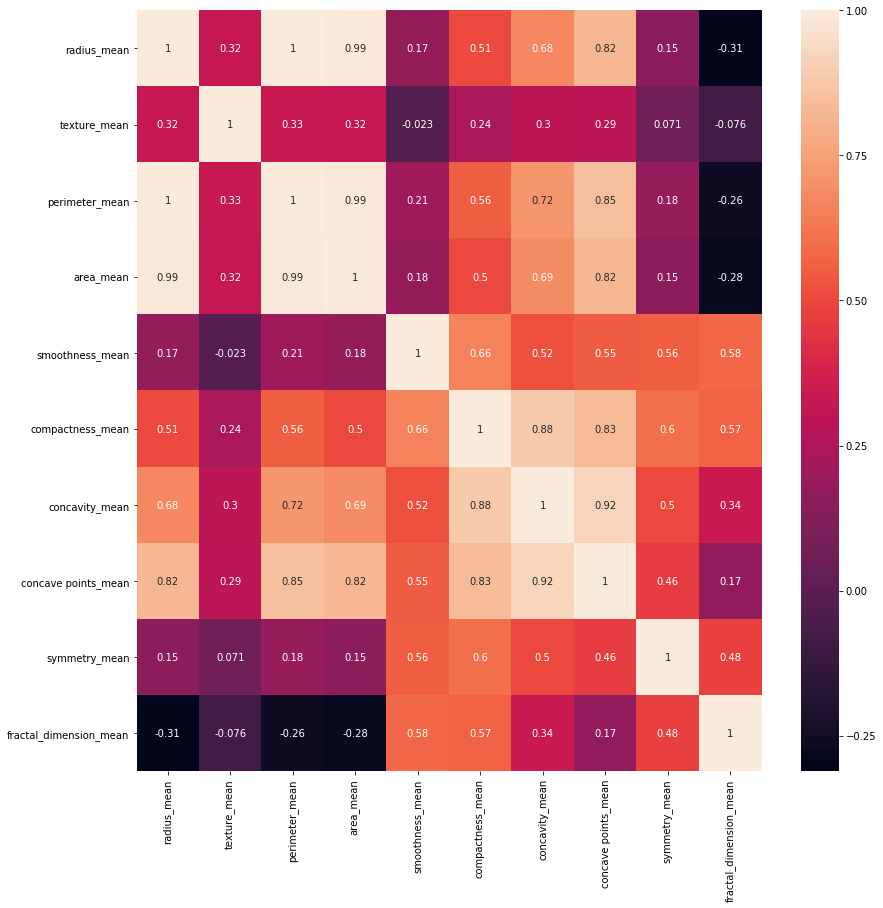

In [4]:
# 将肿瘤诊断结果可视化
plt.figure(figsize=(8, 6))
sns.countplot(data['diagnosis'], label='Count')
# 热力图呈现feature_mean字段之间相关性
corr = data[features_mean].corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True) # annot显示方格中数字

<font color=blue>特征选择：  
1、mean，se，worst是对同一组内容的不同度量方式，保留mean  
2、radius_mean，perimeter_mean，area_mean三个相关属性大，保留radius_mean  
3、compactness_mean，daconcavity_mean，concave points_mean三个相关属性大，保留compactness_mean</font>

In [5]:
# 特征选择
features_remain = ['radius_mean','texture_mean', 'smoothness_mean','compactness_mean','symmetry_mean', 'fractal_dimension_mean'] 

In [6]:
# 抽取30%数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size=0.3)
train_X = train[features_remain]
train_y = train['diagnosis']
test_X = test[features_remain]
test_y = test['diagnosis']

In [7]:
# 数据标准化
train_X = StandardScaler().fit_transform(train_X)
test_X = StandardScaler().fit_transform(test_X)

In [8]:
# 训练svm并测试
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
# 计算准确率
print('准确率为：', metrics.accuracy_score(prediction, test_y))

准确率为： 0.9122807017543859
